# Data visualisation

### Libraries

In [4]:
import TFIDF
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

### Histogram


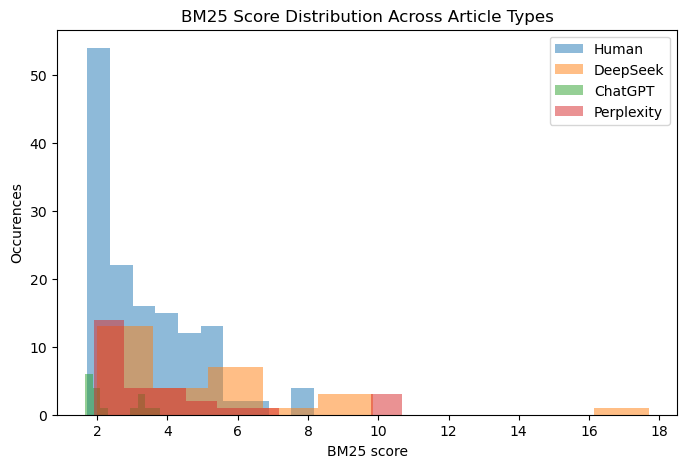

In [5]:
plt.figure(figsize=(8, 5))


nonzeroHuman = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.3]
nonzeroDeepSeek = TFIDF.scoresDeepSeekArticles[TFIDF.scoresDeepSeekArticles > 0.3]
nonzeroChatGPT = TFIDF.scoresChatGPTArticles[TFIDF.scoresChatGPTArticles > 0.3]
nonzeroPerplexity = TFIDF.scoresPerplexityArticles[TFIDF.scoresPerplexityArticles > 0.3]

plt.hist(nonzeroHuman, bins=10, alpha=0.5, label="Human")
plt.hist(nonzeroDeepSeek, bins=10, alpha=0.5, label="DeepSeek")
plt.hist(nonzeroChatGPT, bins=10, alpha=0.5, label="ChatGPT")
plt.hist(nonzeroPerplexity, bins=10, alpha=0.5, label="Perplexity")
plt.xlabel("BM25 score")
plt.ylabel("Occurences")
plt.title("BM25 Score Distribution Across Article Types")
plt.legend()
plt.show()

### Boxplot


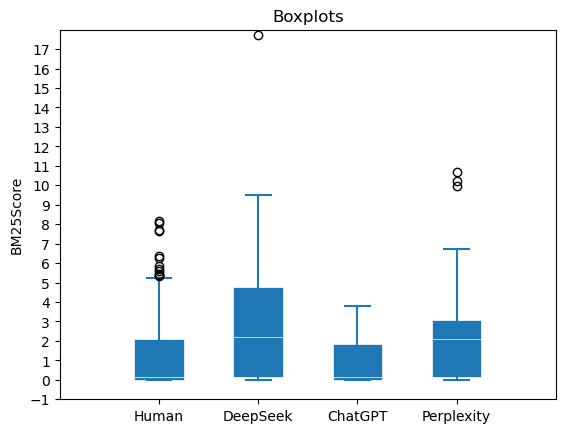

In [6]:
fig, ax = plt.subplots()

positions = [2,4,6,8]

VP = ax.boxplot([TFIDF.scoresHumanArticles, TFIDF.scoresDeepSeekArticles, TFIDF.scoresChatGPTArticles, TFIDF.scoresPerplexityArticles], positions = positions , widths=1, patch_artist=True, 
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 10), xticks=np.arange(1, 10),
       ylim=(-1, 18), yticks=np.arange(-1, 18))

labels = ['Human', 'DeepSeek', 'ChatGPT', 'Perplexity']

ax.set_xticks(positions)
ax.set_xticklabels(labels)

ax.set_title('Boxplots')
plt.ylabel("BM25Score")

plt.show()

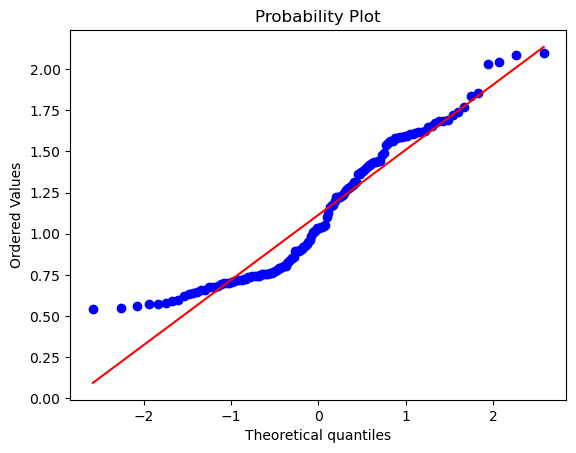

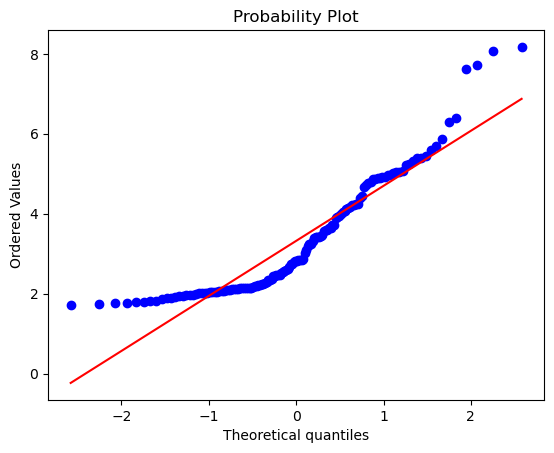

np.float64(0.3286384976525822)

In [7]:
nonzero = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.3]
stats.probplot(np.log(nonzero), dist="norm", plot=plt)
plt.show()

nonzero = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.3]
stats.probplot(nonzero, dist="norm", plot=plt)
plt.show()

zeros = np.sum(TFIDF.scoresHumanArticles > 0.3)
zeroFraction = zeros / len(TFIDF.scoresHumanArticles)
zeroFraction



# Statistik


### Confidence interval

In [8]:
CIHuman = stats.t.interval(0.95, len(nonzeroHuman)-1, loc=np.mean(nonzeroHuman), scale=stats.sem(nonzeroHuman))
CIChatGPT = stats.t.interval(0.95, len(nonzeroChatGPT)-1, loc=np.mean(nonzeroChatGPT), scale=stats.sem(nonzeroChatGPT))
CIDeepSeek = stats.t.interval(0.95, len(nonzeroDeepSeek)-1, loc=np.mean(nonzeroDeepSeek), scale=stats.sem(nonzeroDeepSeek))
CIPerplexity = stats.t.interval(0.95, len(nonzeroPerplexity)-1, loc=np.mean(nonzeroPerplexity), scale=stats.sem(nonzeroPerplexity))

CIHuman,CIChatGPT,CIDeepSeek,CIPerplexity

((np.float64(3.0752613148640773), np.float64(3.562289290233074)),
 (np.float64(2.0143449731449063), np.float64(2.7852350892436393)),
 (np.float64(3.621939175468489), np.float64(6.241634490051137)),
 (np.float64(2.919209569154929), np.float64(4.8576237265520525)))

### Testing CLT for our sanity's sake

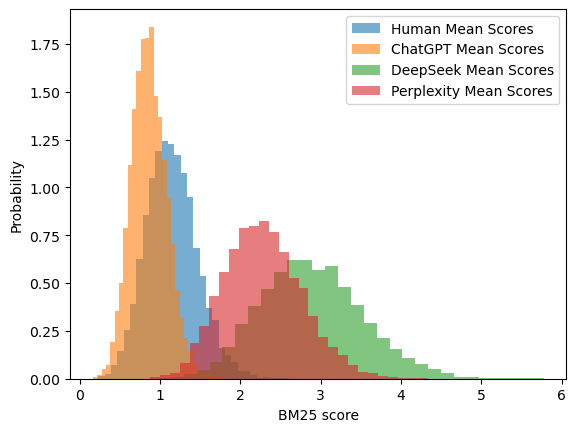

In [15]:
k = 10000
n = 30

humanSampleMeans = [np.random.choice(TFIDF.scoresHumanArticles, size=n, replace=True).mean() for _ in range(k)]
ChatGPTSampleMeans = [np.random.choice(TFIDF.scoresChatGPTArticles, size=n, replace=True).mean() for _ in range(k)]
DeepSeekSampleMeans = [np.random.choice(TFIDF.scoresDeepSeekArticles, size=n, replace=True).mean() for _ in range(k)]
PerplexitySampleMeans = [np.random.choice(TFIDF.scoresPerplexityArticles, size=n, replace=True).mean() for _ in range(k)]
dfHuman = pd.DataFrame({"sample_means": humanSampleMeans})
dfChatGPT = pd.DataFrame({"sample_means": ChatGPTSampleMeans})
dfDeepSeek = pd.DataFrame({"sample_means": DeepSeekSampleMeans})
dfPerplexity = pd.DataFrame({"sample_means": PerplexitySampleMeans})

plt.hist(dfHuman["sample_means"], bins=30, density=True, alpha=0.6, label="Human Mean Scores")
plt.hist(dfChatGPT["sample_means"], bins=30, density=True, alpha=0.6, label="ChatGPT Mean Scores")
plt.hist(dfDeepSeek["sample_means"], bins=30, density=True, alpha=0.6, label="DeepSeek Mean Scores")
plt.hist(dfPerplexity["sample_means"], bins=30, density=True, alpha=0.6, label="Perplexity Mean Scores")
plt.xlabel("BM25 score")
plt.ylabel("Probability")
plt.legend()
plt.show()

### two sample t-test

In [10]:
HumanVSDeepseek = stats.ttest_ind(a=TFIDF.scoresHumanArticles, b=TFIDF.scoresDeepSeekArticles, equal_var=False)
HumanVSChatGPT = stats.ttest_ind(a=TFIDF.scoresHumanArticles, b=TFIDF.scoresChatGPTArticles, equal_var=False)
HumanVSPerplexity = stats.ttest_ind(a=TFIDF.scoresHumanArticles, b=TFIDF.scoresPerplexityArticles, equal_var=False)
float(HumanVSDeepseek.pvalue), float(HumanVSChatGPT.pvalue), float(HumanVSPerplexity.pvalue)

(0.0012176223075564087, 0.13494931966617735, 0.005010117602078094)

### Sample size


In [11]:
n = 1/4*(stats.norm.ppf(0.975)/0.05)**2
float(n)

384.14588206941244

### Percentage AI

In [12]:
AIThreshold = 3.5
scoresAll = [TFIDF.scoresHumanArticles, TFIDF.scoresChatGPTArticles, TFIDF.scoresDeepSeekArticles, TFIDF.scoresPerplexityArticles]

counter = 0
for number in scoresAll[0]:
    if number > AIThreshold:
        counter += 1
fractionDetected = counter / len(scoresAll[0])
fractionDetected


0.12441314553990611